# Project 11: Monthly Sales Trend and Seasonality Analysis

## Objective
The goal of this analysis is to investigate a superstore's sales data to identify two key patterns: the long-term sales trend and the monthly seasonality. This involves transforming daily transactional data into monthly summaries and creating visualizations to uncover insights.

In [37]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_sales = pd.read_csv('train.csv')

# Convert 'Order Date' column to datetime objects, specifying day is first
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], dayfirst=True)

# Set the 'Order Date' as the DataFrame's index to enable time-series functionalities
df_sales.set_index('Order Date', inplace=True)

# Display the first few rows to confirm
display(df_sales.head())

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2017-11-08,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2017-06-12,3,CA-2017-138688,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
2016-10-11,4,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
2016-10-11,5,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## 1. Trend Analysis: Monthly Sales and 6-Month Moving Average
First, we will resample the daily data to a monthly frequency. Then, we will calculate a 6-month moving average to smooth out short-term fluctuations and reveal the underlying long-term trend in sales.

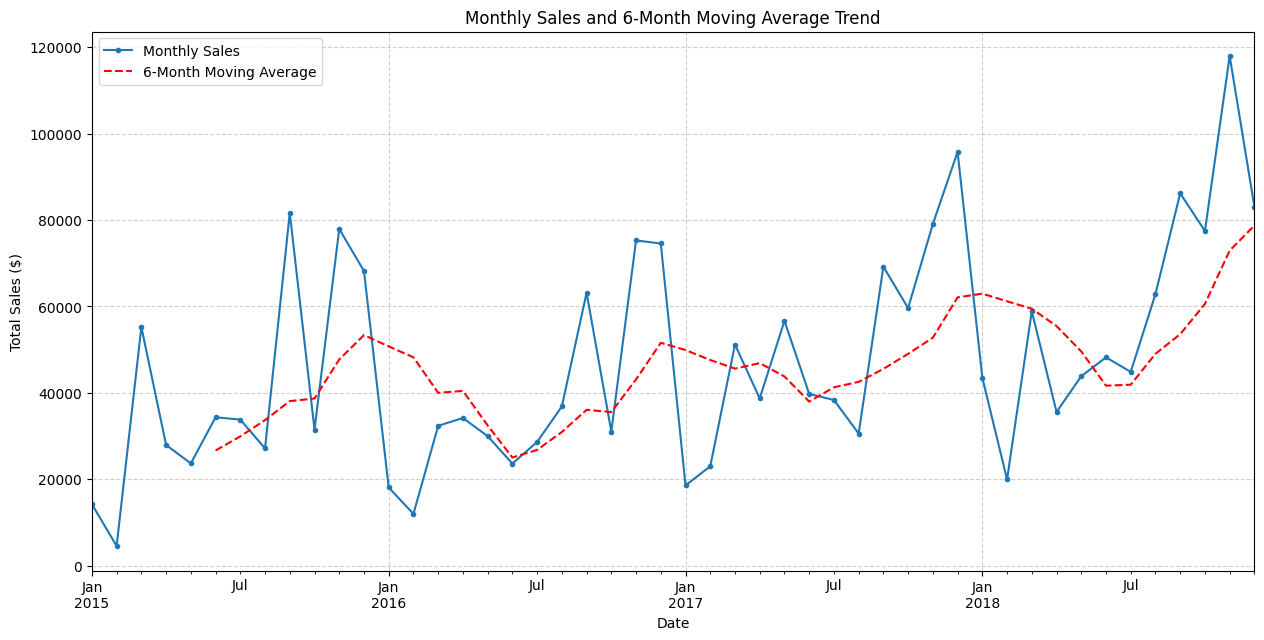

In [38]:
# Resample to get total sales per month end ('ME')
monthly_sales = df_sales['Sales'].resample('ME').sum()

# Calculate the 6-month rolling average on the monthly sales data
rolling_avg_6m = monthly_sales.rolling(window=6).mean()

# --- Visualization ---
plt.figure(figsize=(15, 7))

# Plotting directly from the Pandas Series uses the datetime index automatically
monthly_sales.plot(label='Monthly Sales', marker='.', linestyle='-')
rolling_avg_6m.plot(label='6-Month Moving Average', color='red', linestyle='--')

plt.title('Monthly Sales and 6-Month Moving Average Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Trend Analysis Insight
The chart above shows a clear upward trend in sales over the years, confirmed by the steadily rising 6-month moving average. We can also observe seasonal peaks and troughs within each year.

## 2. Seasonality Analysis: Which Month Sells More on Average?
To identify seasonality, we group the original daily data by the month of the year. This allows us to calculate the average sales for each month across all years in the dataset, revealing which months are consistently stronger or weaker.

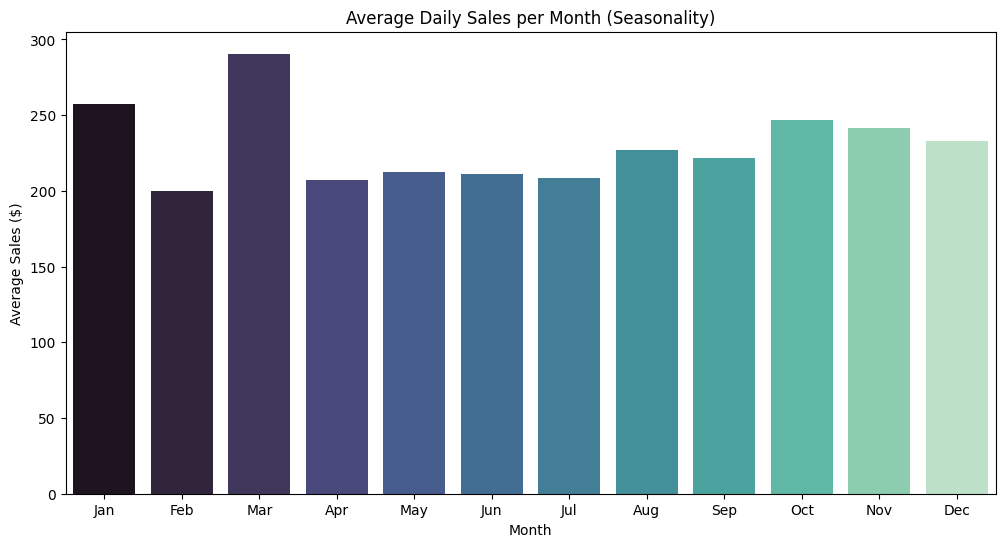

In [39]:
# Group by the month component of the datetime index and calculate the mean
avg_sales_by_month = df_sales.groupby(df_sales.index.month)['Sales'].mean()

# Create a list of month names for better x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_sales_by_month.index = month_names

# --- Visualization ---
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales_by_month.index, y=avg_sales_by_month.values, palette='mako', hue=avg_sales_by_month.index, legend=False)

plt.title('Average Daily Sales per Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Sales ($)')
plt.show()

## 3. Conclusion

In [40]:
# Find the best month programmatically
best_month = avg_sales_by_month.idxmax()
worst_month = avg_sales_by_month.idxmin()

print(f"The analysis confirms a clear seasonal pattern.")
print(f"The month with the highest average sales is '{best_month}'.")
print(f"The month with the lowest average sales is '{worst_month}'.")

The analysis confirms a clear seasonal pattern.
The month with the highest average sales is 'Mar'.
The month with the lowest average sales is 'Feb'.
